In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv('train.csv')

print(df.head())

   Store  Dept        Date  Weekly_Sales IsHoliday
0      1     1  2010-02-05      24924.50     False
1      1     1  2010-02-12      46039.49      True
2      1     1  2010-02-19      41595.55     False
3      1     1  2010-02-26      19403.54     False
4      1     1  2010-03-05      21827.90     False


In [2]:
print(df.isnull().sum())
print(df.dtypes)

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       1
dtype: int64
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday        object
dtype: object


In [4]:
#Data Engineering
df['IsHoliday'] = df['IsHoliday'].fillna(0).astype(int) # Fill NaN with 0 then convert to int
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

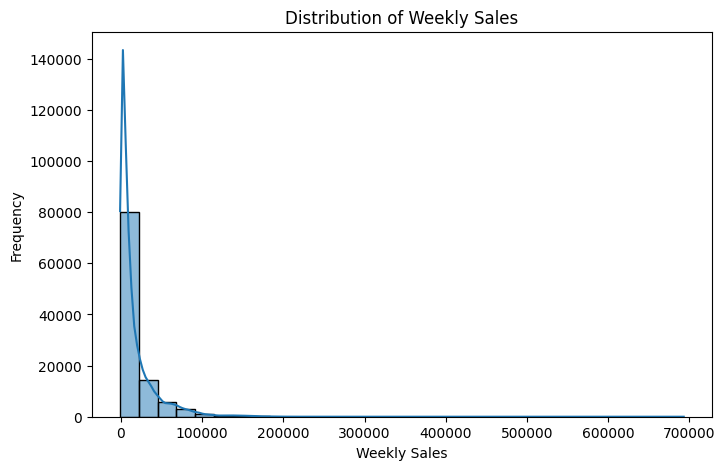

In [5]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

In [7]:
#Model Implementation
X = df[['Store', 'Dept', 'IsHoliday', 'Month', 'Year', 'Day']]
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)   # Train the model

y_pred = model.predict(X_test)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor:')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.2f}')
print(f'R^2 Score: {r2_rf:.2f}')

Random Forest Regressor:
Mean Squared Error: 29939681.19
R^2 Score: 0.95


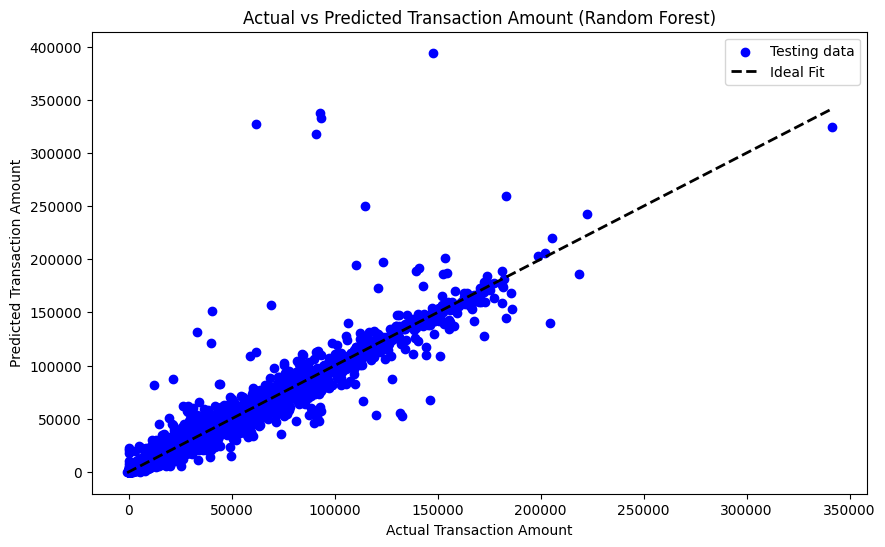

In [9]:
# Visualization of Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Testing data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Transaction Amount')
plt.ylabel('Predicted Transaction Amount')
plt.title('Actual vs Predicted Transaction Amount (Random Forest)')
plt.legend()
plt.show()